<h1><strong>CSE 555 - Introduction to Pattern Recognition</strong></h1>

<h2><strong>Programming Assignment 5 :- Generative Models</strong></h2>
<h4><strong> Jyoti Sinha</strong></h4>

In [ ]:
#Importing Libraries
import numpy as np
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input 
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose
from keras.layers import UpSampling2D
from keras.layers import LeakyReLU
from keras.layers import  Dropout
from keras.optimizers import Adam
from keras import initializers
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [ ]:
#Importing dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
#Processing of dataset
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train.reshape(60000, 784)
adam = Adam(lr=0.0002, beta_1=0.5)


In [ ]:
#Define discrimator model:-
def discriminator_model():
        discriminator = Sequential()
        discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
        discriminator.add(LeakyReLU(0.2))
        discriminator.add(Dropout(0.3))
        discriminator.add(Dense(512))
        discriminator.add(LeakyReLU(0.2))
        discriminator.add(Dropout(0.3))
        discriminator.add(Dense(256))
        discriminator.add(LeakyReLU(0.2))
        discriminator.add(Dropout(0.3))
        discriminator.add(Dense(1, activation='sigmoid'))
        discriminator.compile(loss='binary_crossentropy', optimizer=adam)
        return  discriminator

In [ ]:
#Define generator model:-
def generator_model():
        generator = Sequential()
        generator.add(Dense(256, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
        generator.add(LeakyReLU(0.2))
        generator.add(Dense(512))
        generator.add(LeakyReLU(0.2))
        generator.add(Dense(1024))
        generator.add(LeakyReLU(0.2))
        generator.add(Dense(784, activation='tanh'))
        generator.compile(loss='binary_crossentropy', optimizer=adam)
        return generator

In [ ]:
#Combine the models:-
dim=100
generator=generator_model()
discriminator=discriminator_model()
discriminator.trainable= False
ganinput= Input(shape=(dim,))
x=generator(ganinput)
ganoutput=discriminator(x)
gan= Model(inputs=ganinput,outputs=ganoutput)
opt= Adam(lr=0.0001)
gan.compile(loss='binary_crossentropy',optimizer=opt) 

In [ ]:
#Plot Images:-
def plot_images(samples=16,step=0):
  plt.figure(figsize=(4,4))
  for i in range(samples):
    noise=np.random.uniform(-1,1,size=[batch_size,100])
    images=generator.predict(noise)
    plt.subplot(4,4,i+1)
    image = images[i, :,]
    image=np.reshape(image,[28,28])
    plt.imshow(image,cmap='hot')
    plt.axis('off')
  plt.show()


Step0


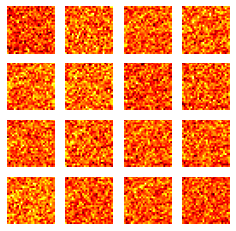

Step1000


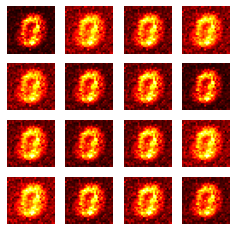

Step2000


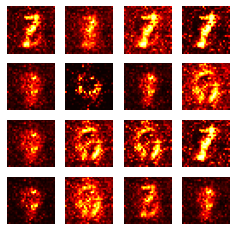

Step3000


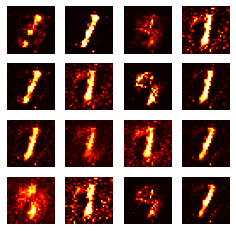

Step4000


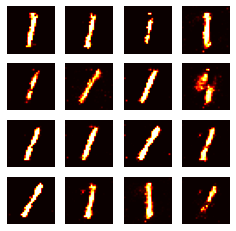

Step5000


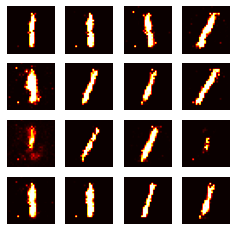

Step6000


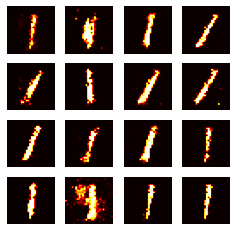

Step7000


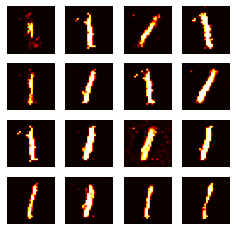

Step8000


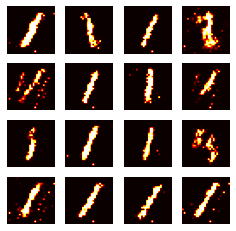

Step9000


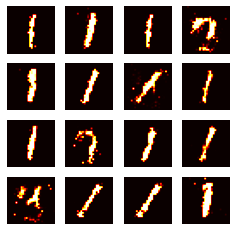

Step0


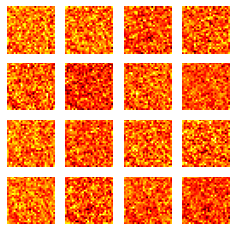

Step1000


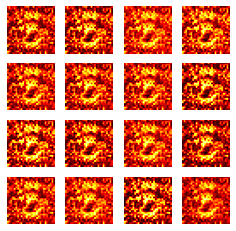

In [ ]:
batch_size= 32
noise_input=np.random.uniform(-1,1,size=[16,100])
for step in range(10000):
    noise=np.random.uniform(-1,1,size=[batch_size,100])
    batch= X_train[np.random.randint(0,X_train.shape[0],size=batch_size)].reshape(batch_size,784)
    generator_output=generator.predict(noise)
    conc=np.concatenate([batch,generator_output])
    gen= np.zeros(2*batch_size)
    gen[:batch_size] =1
    discriminator.trainable= True
    loss_D=discriminator.train_on_batch(conc,gen)
    noise=np.random.uniform(-1,1,size=[batch_size,100])
    y_generator=np.ones(batch_size)
    discriminator.trainable= False
    loss_Generator= gan.train_on_batch(noise,y_generator)
    if step % 1000==0:
       print('Step{}'.format(step))
       plot_images(samples=noise_input.shape[0],step=(step+1))

